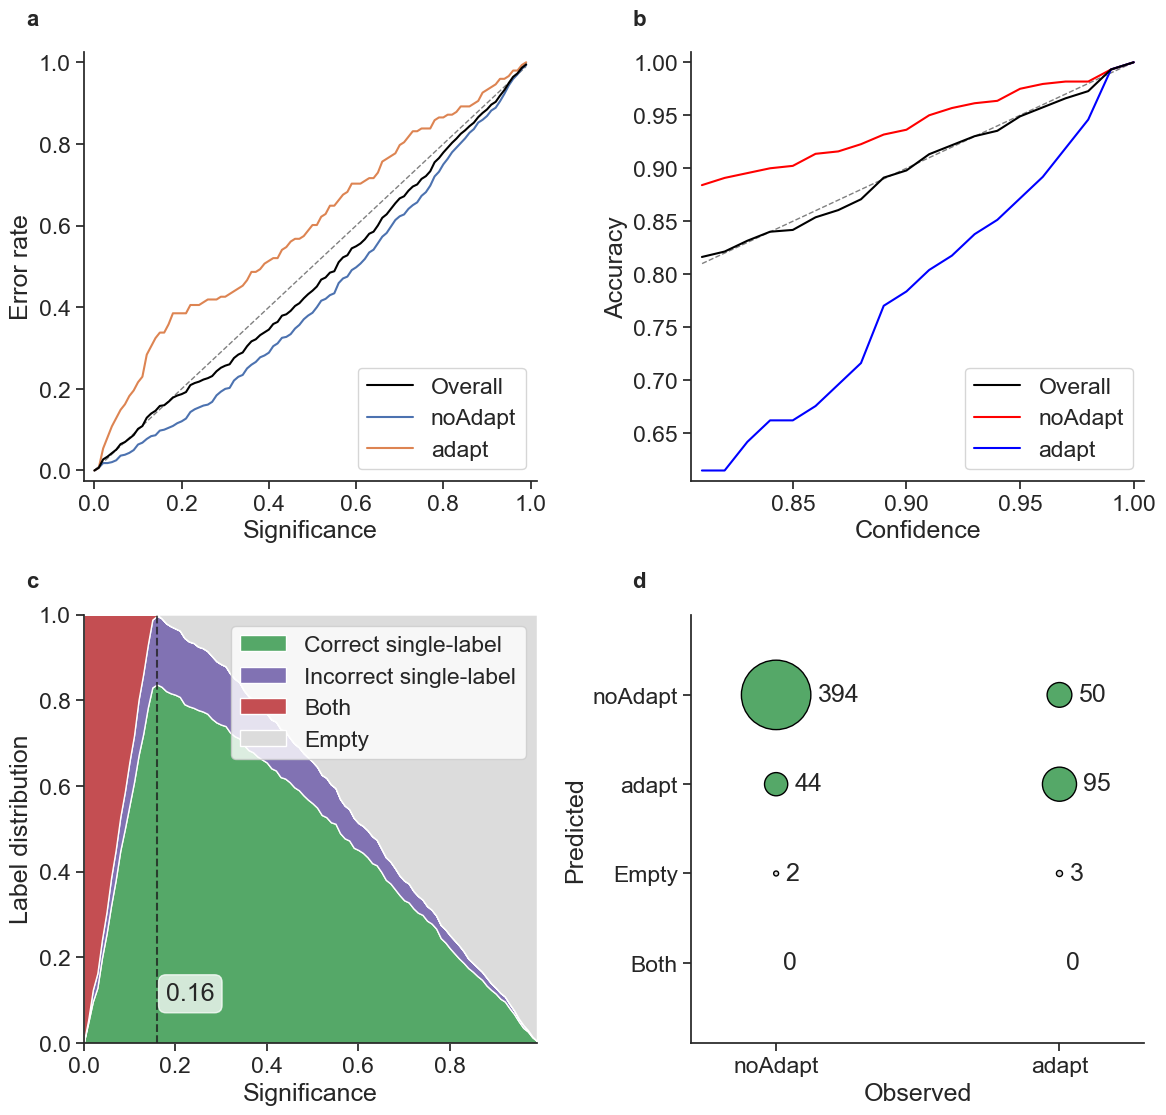

In [13]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import settings

sys.path.append("plot_utils/python/src/")
from pharmbio.cp import metrics
from pharmbio.cp import plotting
from pharmbio.cpsign import *

# Set a different style and context
plotting.update_plot_settings(context='talk', font_scale=1.5)
df = pd.read_csv(settings.output_dir+'/C_DT_predictions.csv', sep=';')
true_labels = df['true_labels'].values
p_values = df.drop(columns=['true_labels']).values


fig, axes = plt.subplots(2,2, figsize=(12,12))
class_labels=['noAdapt','adapt']
# Calibration plot
plotting.plot_calibration_clf(true_labels, p_values, ax=axes[0,0], labels=class_labels)
axes[0, 0].text(-0.1, 1.1, 'a', transform=axes[0, 0].transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

plotting.plot_calibration_clf(true_labels, p_values,labels=class_labels,
                              sign_vals=np.arange(0.0,.2,0.01),
                              cm = ['red','blue'], ax=axes[0,1],
                              plot_all_labels=True, flip_x=True, # confidence instead of significance on x-axis
                              flip_y=True, # accuracy instead of error rate on y-axis
                              ) 
#axes[0, 1].set_title('Calibration plot confidence vs accuracy', fontsize=16)
axes[0, 1].text(-0.1, 1.1, 'b', transform=axes[0, 1].transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

plotting.plot_label_distribution(y_true=true_labels,p_values=p_values, ax=axes[1,0], display_incorrect=True)
#axes[1, 0].set_title('Label distribution', fontsize=16)
axes[1, 0].text(-0.1, 1.1, 'c', transform=axes[1, 0].transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

plotting.plot_confusion_matrix_bubbles(metrics.confusion_matrix(true_labels,p_values, .17, labels=class_labels), ax=axes[1,1])
#axes[1, 1].set_title('Confusion matrix (sign=0.2)', fontsize=16)
axes[1, 1].text(-0.1, 1.1, 'd', transform=axes[1, 1].transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

fig.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig(settings.output_dir+'calibration_plots.pdf')


